In [1]:
#importing libraries
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the dataset
data=pd.read_csv('insurance.csv')
data.sample(5)  #getting 5 samples from the dataset

,age,sex,bmi,children,smoker,region,charges
333,56,female,28.785,0,no,northeast,11658.37915
811,33,female,42.940,3,no,northwest,6360.99360
603,64,female,39.050,3,no,southeast,16085.12750
274,25,male,27.550,0,no,northwest,2523.16950
930,26,male,46.530,1,no,southeast,2927.06470


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


we can see that none of the columns have null values so we don't need to perform data cleaning 

# Exploratory Data Analysis

male      676
female    662
Name: sex, dtype: int64


<AxesSubplot:xlabel='sex', ylabel='count'>

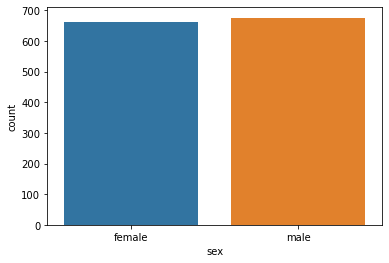

In [4]:
print(data['sex'].value_counts())
sns.countplot(x='sex',data=data)

we can see that the number of male and females present in our dataset is almost same

no     1064
yes     274
Name: smoker, dtype: int64


<AxesSubplot:xlabel='smoker', ylabel='count'>

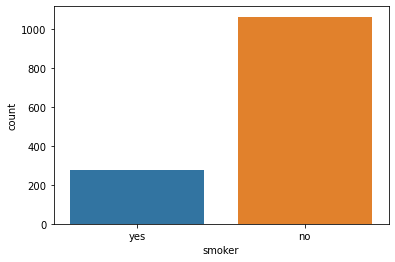

In [5]:
print(data['smoker'].value_counts())
sns.countplot(x='smoker',data=data)

we can see that most of the people are non-smokers with about 20% of the people being smokers

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


<AxesSubplot:xlabel='region', ylabel='count'>

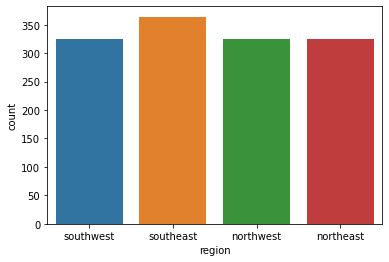

In [6]:
print(data['region'].value_counts())
sns.countplot(x='region',data=data)

value of all the regions are almost the same with southeast having slightly high number of people

In [7]:
#label encoding all the categorical variables
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(data.sex.drop_duplicates()) 
data.sex = le.transform(data.sex)
# smoker or not
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)
#region
le.fit(data.region.drop_duplicates()) 
data.region = le.transform(data.region)

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64


<AxesSubplot:>

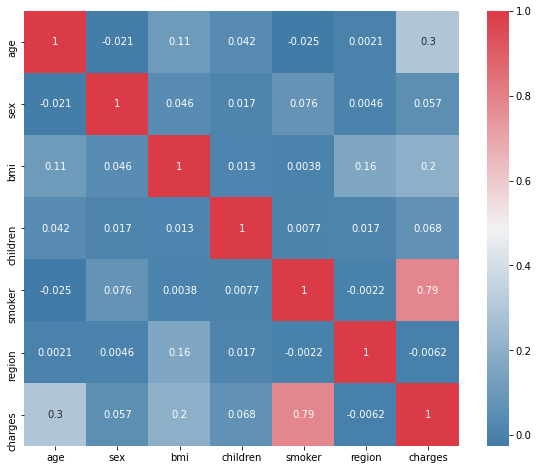

In [9]:
#checking correlation of the features with our target variable
print(data.corr()['charges'].sort_values())
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True,annot=True, ax=ax)

we can see that there is a strong correlation between smoker , which makes sense

<AxesSubplot:xlabel='charges', ylabel='Count'>

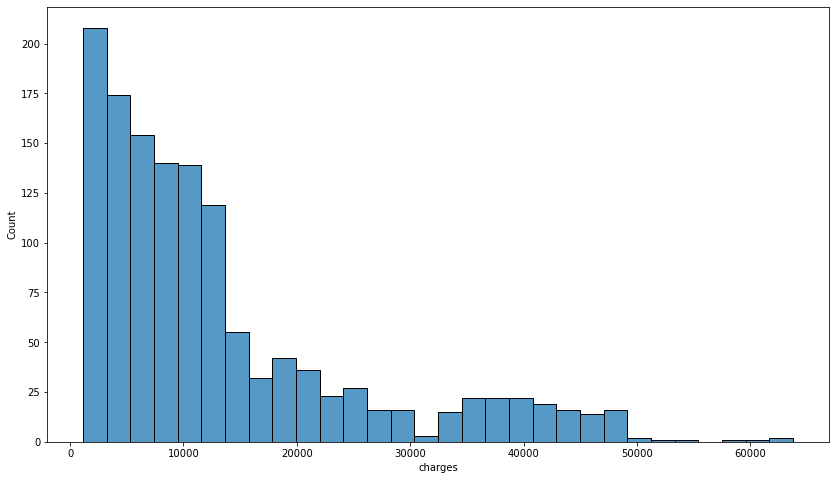

In [10]:
plt.figure(figsize=(14,8))
sns.histplot(data=data,x='charges')

we can observe from the graph that most of the people have charges between 0 to 10000 and the people keep decreasing as the charges increase

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

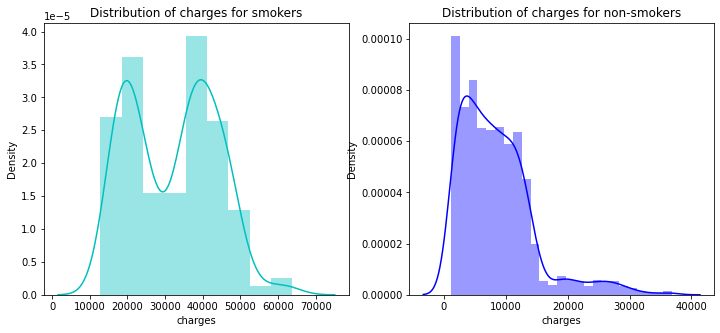

In [12]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(data[(data.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

we can observe from the graph that people who smoke tend to spend more on treatments than non smokers . See, that's why you shouldn't smoke :)

<AxesSubplot:xlabel='smoker', ylabel='count'>

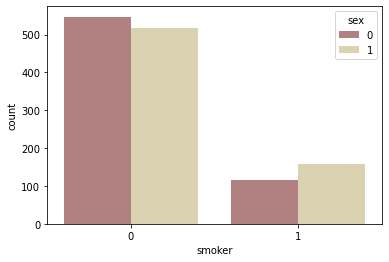

In [13]:
sns.countplot(x="smoker",hue = 'sex', palette="pink", data=data,)

we can see that more men smoke (sex 0 means men) so we can also assume that the charges of treatment for men would be more compared to women

<AxesSubplot:title={'center':'Box plot for charges of women'}, xlabel='charges', ylabel='smoker'>

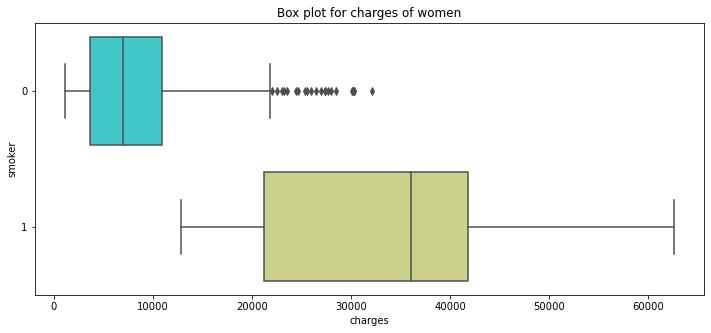

In [14]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 1)] , orient="h", palette = 'rainbow')

<AxesSubplot:title={'center':'Box plot for charges of men'}, xlabel='charges', ylabel='smoker'>

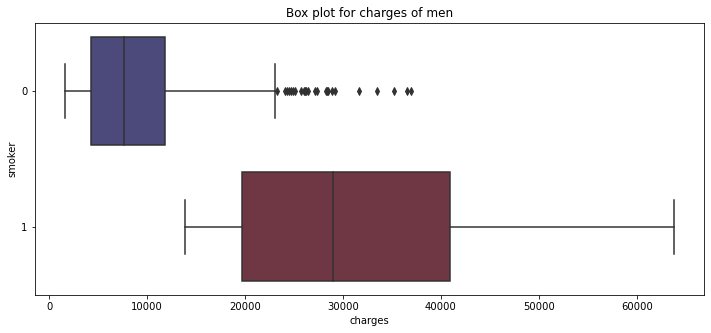

In [15]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 0)] , orient="h", palette = 'icefire')

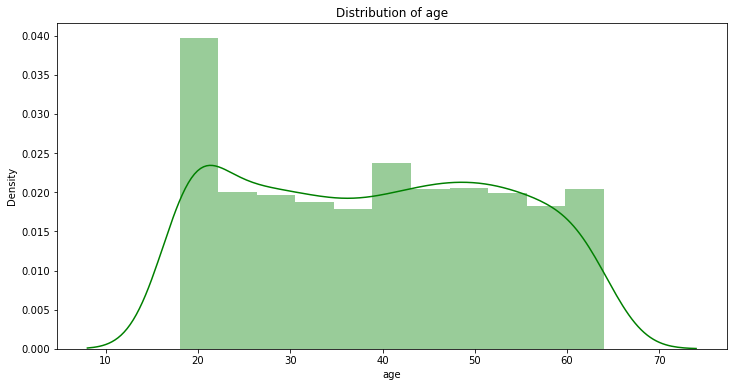

In [16]:
# let's see how the age affects the cost of patients
plt.figure(figsize=(12,6))
plt.title("Distribution of age")
ax = sns.distplot(data["age"], color = 'g')

we can see that most of the people in the dataset are 20-25 years old and minimum age is 18 while 64 being highest . Now let's take a look at how many of 18 years old are smokers

Text(0.5, 1.0, 'The number of smokers and non-smokers (18 years old)')

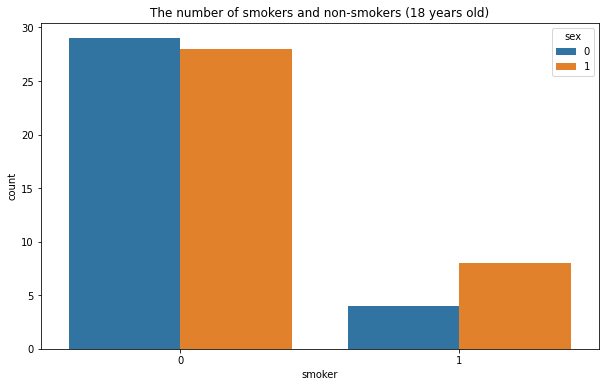

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(x="smoker",hue='sex', data=data[(data.age == 18)])
plt.title("The number of smokers and non-smokers (18 years old)")

we can see that there are a few 18 year olds (both male and female) that are smokers

Text(0.5, 1.0, 'Smokers and non-smokers')

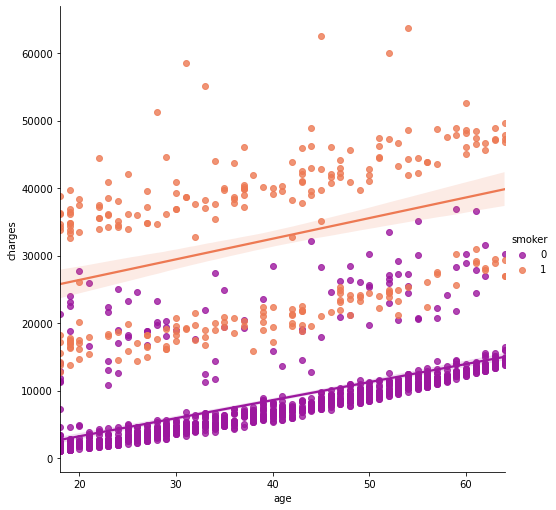

In [18]:
sns.lmplot(x="age", y="charges", hue="smoker", data=data, palette = 'plasma', size = 7)
ax.set_title('Smokers and non-smokers')

we can observe from the dataset that for people who don't smoke the cost increases with their age but we don't see such dependencies for smokers.

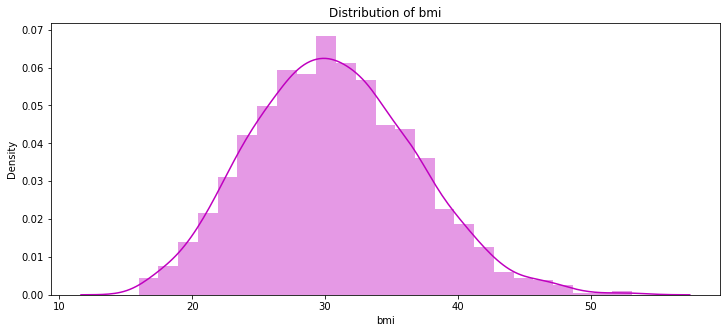

In [19]:
plt.figure(figsize=(12,5))
plt.title("Distribution of bmi")
ax = sns.distplot(data["bmi"], color = 'm')

we can observe from the above distplot that average BMI of the person present in the dataset is 30. Now let's try to see the affect of BMI on their charges

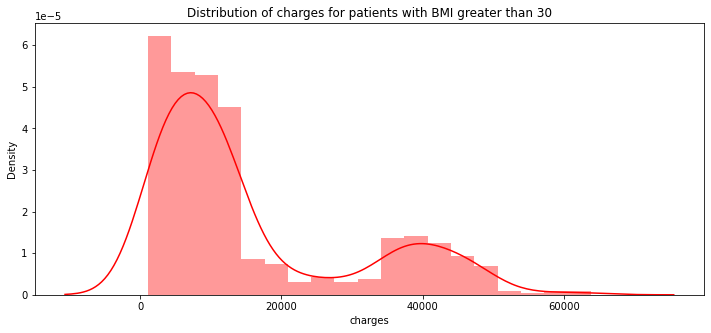

In [20]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.distplot(data[(data.bmi >= 30)]['charges'], color = 'r')

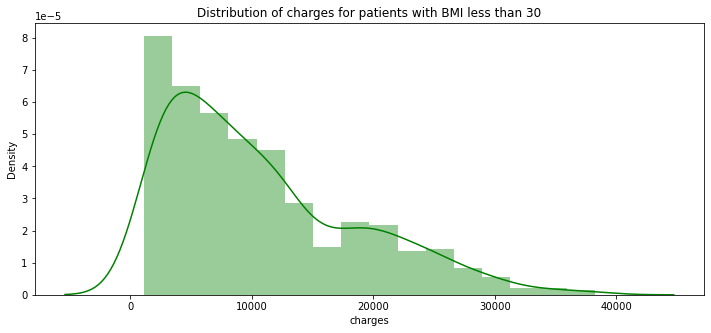

In [21]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI less than 30")
ax = sns.distplot(data[(data.bmi < 30)]['charges'], color = 'g')

we can observe that people with BMI greater than 30 tend to spend more on treatments

<AxesSubplot:xlabel='children', ylabel='count'>

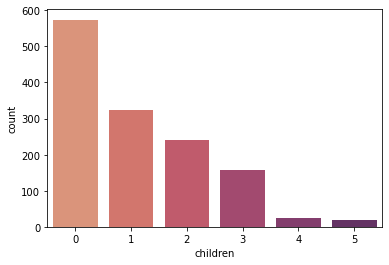

In [22]:
# let's see the number of children present in our dataset
sns.countplot(x="children", palette="flare", data=data,)

we can see that most of our patients (about 600) don't have kids and a few having 4,5 kids

# Applying ML Algorithms

In [23]:
R2_Scores = []
models = ['Linear Regression', 'RandomForest Regression','XGBoost Regressor']

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

#splitting the data into training and testing
x = data.drop(['charges'], axis = 1)
y = data.charges

X_train,X_test,y_train,y_test = train_test_split(x,y, random_state = 42)
# Linear Regression
lin_reg =make_pipeline(StandardScaler(),LinearRegression())
lin_reg.fit(X_train , y_train)
accuracies = cross_val_score(estimator = lin_reg, X = X_train, y = y_train, cv = 10)
y_pred = lin_reg.predict(X_test)
print('')
print('     Linear Regression      ')
print('Score : %.4f' % lin_reg.score(X_test, y_test))
print( accuracies)
print('Mean score: %0.3f'% accuracies.mean())

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)
print('')
print('MSE    : %0.2f ' % mse)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)
R2_Scores.append(r2)


     Linear Regression      
Score : 0.7669
[0.76057975 0.74872437 0.851063   0.74054515 0.73217062 0.67252427
 0.59195142 0.69646742 0.76155267 0.77433943]
Mean score: 0.733

MSE    : 35174149.33 
RMSE   : 5930.78 
R2     : 0.77 


In [25]:
# Random Forrest
clf_rf = RandomForestRegressor()
clf_rf.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_rf, X = X_train, y = y_train, cv = 10)
y_pred = clf_rf.predict(X_test)
print('')
print('     Random Forest     ')
print('Score : %.4f' % clf_rf.score(X_test, y_test))
print(accuracies)
print('Mean: %0.3f' % accuracies.mean())

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)
print('')
print('MSE    : %0.2f ' % mse)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)
R2_Scores.append(r2)


     Random Forest     
Score : 0.8531
[0.85094442 0.84332222 0.92498025 0.85024874 0.76534293 0.84823593
 0.72491738 0.76363354 0.81332489 0.85244407]
Mean: 0.824

MSE    : 22163595.47 
RMSE   : 4707.82 
R2     : 0.85 


In [26]:
# XGBoost
clf_xgb = XGBRegressor()
clf_xgb.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_xgb, X = X_train, y = y_train, cv = 10)
y_pred = clf_xgb.predict(X_test)
print('')
print('     XGBoost     ')
print('Score : %.4f' % clf_xgb.score(X_test, y_test))
print(accuracies)
print('Mean: %0.3f' % accuracies.mean())

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)
print('')
print('MSE    : %0.2f ' % mse)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)
R2_Scores.append(r2)


     XGBoost     
Score : 0.8220
[0.82222606 0.82674198 0.90737372 0.80515995 0.72937903 0.81386368
 0.64091824 0.74800679 0.79968534 0.82117211]
Mean: 0.791

MSE    : 26862036.43 
RMSE   : 5182.86 
R2     : 0.82 


In [27]:
compare = pd.DataFrame({'Algorithms' : models , 'R2-Scores' : R2_Scores})
compare.sort_values(by='R2-Scores' ,ascending=False)

,Algorithms,R2-Scores
1,RandomForest Regression,0.853115
2,XGBoost Regressor,0.821977
0,Linear Regression,0.766891


we can see that Random Forest gives us the best R2 scores with 84% accuracy, let's try to implement grid search to tune its hyperparameters to increase the R2 score

In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2','sqrt'],
               'n_estimators': [10,25,50,100]}

g_search = GridSearchCV(estimator = clf_rf, param_grid = param_grid, 

                          cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

In [29]:
#finding the best parameters for our model
g_search.fit(X_train, y_train)
print(g_search.best_params_)

{'bootstrap': True, 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 50}


In [30]:
# Random Forrest
clf_rf = RandomForestRegressor(bootstrap=True,max_depth=5,max_features=6,n_estimators=50)
clf_rf.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_rf, X = X_train, y = y_train, cv = 10)
y_pred = clf_rf.predict(X_test)
print('')
print('     Random Forest     ')
print('Score : %.4f' % clf_rf.score(X_test, y_test))
print(accuracies)
print('Mean: %0.3f' % accuracies.mean())

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)
print('')
print('MSE    : %0.2f ' % mse)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)
R2_Scores.append(r2)


     Random Forest     
Score : 0.8597
[0.88509154 0.84652526 0.94371527 0.87868018 0.78658904 0.86433292
 0.74178574 0.81250704 0.83698434 0.86105965]
Mean: 0.846

MSE    : 21171001.67 
RMSE   : 4601.20 
R2     : 0.86 


we can see that the R2 score increased by 0.1 and the Mean score increased by 0.2 after tuning the hyperparameters.